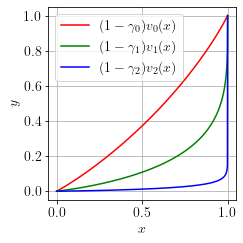

In [27]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx", 
    "font.size": 14
})

colors = ["red", "green", "blue"]
gammas = [0.5, 0.9, 0.99]
x0 = np.linspace(0,1,1000,dtype=np.float128)
d0 = np.copy(x0)
values = []
Hs = []
Ws = []
L = 1.5
D = 1
C = 1

Bs = [] # Bernstein's bounds

Phi = lambda x: x**L

for gamma in gammas:
    beta = np.log(1/gamma)/np.log(L) 
    K = lambda x: (np.log(L)*D**(1-beta)*x**beta + np.log(gamma)*x)/np.log(gamma*L)
    Hs.append( C*K(d0)/(1-gamma) )
    if L*gamma < 1:
        Bs.append( 2*C/(1-gamma*L) * d0)
    else:
        Bs.append( 2*L * (C/(gamma*L-1))**beta * (1/(1-gamma))**(1-beta) * d0**beta )
    x = x0.copy()
    v = np.zeros_like(x)
    for n in range(10000):
        v += gamma**n * x # (x**(L**n))
        x = Phi(x)
    values.append(v)
    Ws.append( v[-1]-v[::-1] )

fig, ax = plt.subplots(1, 1, figsize=(4*0.9,4*0.9))

for idx, (gamma, v) in enumerate(zip(gammas, values)):
    ax.plot(x0, v*(1-gamma), color=colors[idx], label=f"$(1-\gamma_{idx}) v_{idx}(x)$")
    # ax.plot(x, dv, label="$\partial_x v(x)$")
    # ax.axhline(y=1/(1-gamma), color='r', linestyle='-', label="$y = 1/(1-\gamma)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.grid()
ax.legend()
fig.tight_layout()
fig.savefig("./value_function_example.pdf")
plt.show()

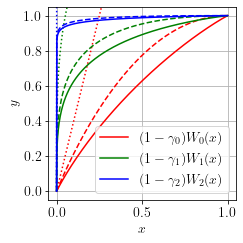

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(4*0.9,4*0.9))
for idx, (gamma, W, H, B) in enumerate(zip(gammas, Ws, Hs, Bs)):
    ax.plot(x0, (1-gamma)*W, color=colors[idx], label=f"$(1-\gamma_{idx}) W_{idx}(x)$")
    ax.plot(x0, (1-gamma)*H, "--", color=colors[idx]) 
    ax.plot(x0, (1-gamma)*B, ":", color=colors[idx]) 

ax.set_ylim([-0.05, 1.05])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.grid()
ax.legend()
fig.tight_layout()
fig.savefig("./value_function_continuity_bounds.pdf")
plt.show()


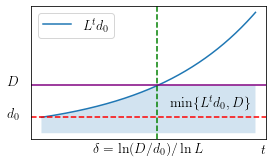

In [29]:
# plots for the proof of Thr. 1
t = np.linspace(0,5,1000)
L = 1.5
D = 3
d0 = 1
delta = np.log(D/d0)/np.log(L)

fig, ax = plt.subplots(1,1,figsize=(4,2.5))
ax.plot(t, L**t * d0, label="$L^t d_0$")
ax.axhline(D, color="purple")
plt.text(-0.8, D,'$D$')
ax.axhline(d0, linestyle="dashed", color="red")
plt.text(-0.8, d0,'$d_0$')
ax.axvline(delta, linestyle="dashed", color="green")
plt.text(delta-1.5,-1.2,'$\delta = \ln (D/d_0) / \ln L$')
ax.legend()

minimum = np.min(np.stack((L**t*d0, np.ones_like(t)*D)),axis=0)
ax.fill_between(t, np.zeros_like(t), minimum, alpha=0.2)
plt.text(3, 1.7,'$\min\{ L^t d_0, D \}$')

ax.set_xlabel("$t$", loc="right")
# ax.set_ylabel('between y1 and 1')

# ax.grid()
ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
fig.tight_layout()
fig.savefig("./proof.pdf")
plt.show()